# Imports

In [1]:
from tensorflow_probability import edward2 as ed
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import inferpy as inf 
from bayespy import nodes
from bayespy.inference import VB
import bayespy.plot as bpplt

/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

# Constants

In [20]:
# Data dimension
D = 2
# Mixture components
K = 2
# Datapoints of each component
N1 = 100
N2 = 900
N = N1+N2

# Generate data samples

In [21]:
###### DATA SAMPLES ######
# Define two normal distribution
aux1 = inf.models.Normal(loc=tf.ones([D])*1, scale = 1)
aux2 = inf.models.Normal(loc=tf.ones([D])*10, scale = 1)
# Stack 300 samples from the first and 700 from the second
data = np.vstack([aux1.sample(N1), aux2.sample(N2)])

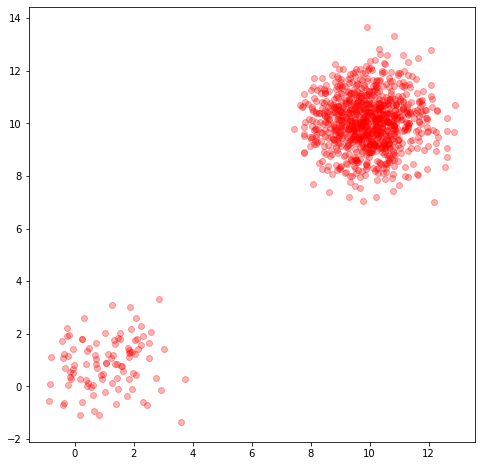

In [22]:
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'ro',alpha=0.3)
plt.show()

# Define variables

In [23]:
# Location
mu = nodes.Gaussian(np.zeros(D), 0.01 * np.identity(D), plates=(K,))
# Precision
Lambda = nodes.Wishart(D, D * np.identity(D), plates=(K,))
# Cluster prob
pi = nodes.Dirichlet(0.01 * np.ones(K))
# Observation cluster
z = nodes.Categorical(pi, plates=(N,))
# Observation value
x = nodes.Mixture(z, nodes.Gaussian, mu, Lambda)

# Message Passing Algorithm

In [24]:
# set observations
x.observe(data)

In [25]:
# Define variational method as VB
Q = VB(x, mu, z, Lambda, pi)

In [26]:
# initialize z to random
z.initialize_from_random()
# set number of iterations
Q.update(repeat=200)

Iteration 1: loglike=-4.246506e+03 (0.007 seconds)
Iteration 2: loglike=-4.183944e+03 (0.007 seconds)
Iteration 3: loglike=-3.762793e+03 (0.006 seconds)
Iteration 4: loglike=-3.462179e+03 (0.006 seconds)
Iteration 5: loglike=-3.377564e+03 (0.006 seconds)
Iteration 6: loglike=-3.342259e+03 (0.006 seconds)
Iteration 7: loglike=-3.317904e+03 (0.005 seconds)
Iteration 8: loglike=-3.281660e+03 (0.006 seconds)
Iteration 9: loglike=-3.210394e+03 (0.006 seconds)
Iteration 10: loglike=-3.198527e+03 (0.005 seconds)
Iteration 11: loglike=-3.198507e+03 (0.006 seconds)
Converged at iteration 11.


/home/ludvins/.pyenv/versions/3.6.9/envs/InferPy/lib/python3.6/site-packages/bayespy/inference/vmp/nodes/categorical.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  u0[[np.arange(np.size(x)), np.ravel(x)]] = 1


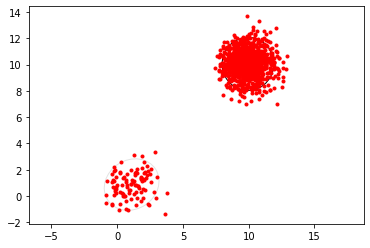

In [27]:
# Plot gaussians
bpplt.gaussian_mixture_2d(x, alpha=pi)
bpplt.pyplot.show()

In [28]:
print(pi)
print(mu)

 ~ Dirichlet(alpha)
  alpha =
[900.01 100.01]
 ~ Gaussian(mu, Cov)
  mu = 
[[ 9.94555331 10.04790012]
 [ 1.09822776  0.87370066]]
  Cov = 
[[[1.07343090e-03 6.69998528e-06]
  [6.69998528e-06 1.12960469e-03]]

 [[1.08532618e-02 1.40230382e-03]
  [1.40230382e-03 9.57821271e-03]]]

